![](https://assets-global.website-files.com/5fbe376a36d4106214faaf3c/62200f9fbd736d0bb2002721_20220302-Credit%20Card%20Fraud%20Detection_Blog%20Thumbnail%20Image.png)

### Credit Card Fraud Detection
<p align="justify">
In this code, we address the challenge of handling imbalanced datasets and building a predictive model for credit card fraud detection. Imbalanced datasets, where one class greatly outnumbers the other, can lead to biased model performance. To tackle this issue, we employ the technique of random under-sampling, which aims to balance the classes while maintaining the integrity of the dataset.</p>
Our goal is to create a logistic regression model that can accurately classify fraudulent credit card transactions. To evaluate the model's performance, we utilise the ROC curve and calculate the area under the ROC curve (AUC), which serves as a measure of the model's predictive capability.



### Approaches:

##### Data Loading and Exploration:
We begin by loading a credit card transaction dataset, which is commonly prone to class imbalance due to the rarity of fraudulent transactions. We display a snippet of the dataset to provide an initial overview.

##### Class Distribution Analysis:
Understanding the class distribution is crucial. We analyse the distribution of the target variable 'Class' (fraudulent or not) and calculate the proportions of each class. Additionally, we compute the imbalance ratio to quantify the class imbalance.

##### Random Under-Sampling:
To address class imbalance, we employ random under-sampling. This technique reduces the majority class instances to create a balanced dataset. We carefully adjust the 'sampling_strategy' parameter to maintain a reasonable ratio between the two classes.

##### Data Splitting:
We split the resampled data into training and testing sets. This ensures that the model's performance is assessed on unseen data.

##### Logistic Regression Model:
A logistic regression model is trained on the balanced dataset. Logistic regression is a suitable choice due to its simplicity and interpretability.

##### Model Evaluation:
We predict the target variable using the test set and calculate the accuracy of the model. Accuracy provides a general idea of the model's performance.

##### Receiver Operating Characteristic (ROC) Curve:
The ROC curve illustrates the trade-off between true positive rate and false positive rate for different threshold values. We calculate the ROC curve and compute the area under the curve (AUC). A higher AUC indicates better model performance.

##### Visualisation:
We visualise the ROC curve, highlighting the model's performance in differentiating between the classes. The curve's shape and the AUC provide insights into the model's predictive ability.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc, accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Analyse class distribution and imbalance ratio
class_distribution = df['Class'].value_counts()
class_proportions = class_distribution / len(df)
imbalance_ratio = class_distribution[1] / class_distribution[0]

print("Class Distribution:")
print(class_distribution)
print("\nClass Proportions:")
print(class_proportions)
print("\nImbalance Ratio:", imbalance_ratio)

Class Distribution:
0    284315
1       492
Name: Class, dtype: int64

Class Proportions:
0    0.998273
1    0.001727
Name: Class, dtype: float64

Imbalance Ratio: 0.0017304750013189597


In our dataset, there are 284,315 samples belonging to the Class 0, while the Class 1 contains only 492 samples. This big difference in the number of samples suggests that there's an imbalance between the two classes, with the majority class being much more prevalent.
If we look at the proportions, we see that Class 0 makes up nearly 99.83% of the entire dataset. On the other hand, Class 1 represents only about 0.17% of the dataset. Additionally,the imbalance ratio is approximately 0.00173. This low ratio indicates a considerable imbalance between the two classes.

In [4]:
# Apply random under-sampling to balance the classes
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Apply Random Under Sampling
rus = RandomUnderSampler(sampling_strategy=0.5)  # Adjust sampling_strategy as needed
X_resampled, y_resampled = rus.fit_resample(X, y)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [6]:
# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Make predictions on the test set and calculate accuracy
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:", accuracy)

accuracy: 0.9628378378378378


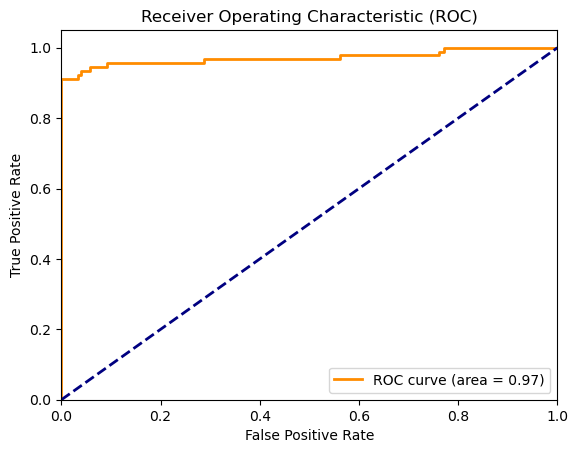

In [8]:
# Calculate and plot ROC curve
y_pred_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()